<a href="https://colab.research.google.com/github/JadonTelep/MAT-422/blob/main/SP_24_MAT_422_3_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 3 - Calculus and Optimization**

## 3.4 Logistic regression

Logistic regression is a model that in its basic form uses a logistic function to model a binary dependent variable. It can be extended to several classes of events such as the classification of images. In this section, we illustrate the use of gradient descent on binary classification by logistic regression.

Given the input data is of the form $\left\{\left(\boldsymbol{\alpha}_{i}, b_{i}\right): i=1, \ldots, n\right\}$ where $\boldsymbol{\alpha}_{i} \in$ $\mathbb{R}^{d}$ are the features and $b_{i} \in\{0,1\}$ is the label. As before, we use a matrix representation: $A \in \mathbb{R}^{n \times d}$ has rows $\boldsymbol{\alpha}_{j}^{T}, j=1, \ldots, n$, and $\mathbf{b}=\left(b_{1}, \ldots, b_{n}\right)^{T} \in$ $\{0,1\}^{n}$. We wish to find a function of the features that approximates the probability of the label 1 . For this purpose, we model the logit function of the probability of label 1 as a linear function of the features. Fig. 3.11 is the graph of the logit function.

For $\mathbf{x}, \boldsymbol{\alpha} \in \mathbb{R}^{d}$, let $p(\boldsymbol{\alpha} ; \mathbf{x})$ be the probability of the output to be 1 . We define
$$
\log \frac{p(\boldsymbol{\alpha} ; \mathbf{x})}{1-p(\boldsymbol{\alpha} ; \mathbf{x})}=\boldsymbol{\alpha}^{T} \mathbf{x}
$$

Here, $\boldsymbol{\alpha}^{T} \mathbf{x}=\sum x_{i} \alpha_{i}$ can be viewed as a regression problem, which seeks the best parameters $(\mathbf{x})$ with given data $(\boldsymbol{\alpha})$. Rearranging this expression gives
$$
p(\boldsymbol{\alpha} ; \mathbf{x})=\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)
$$

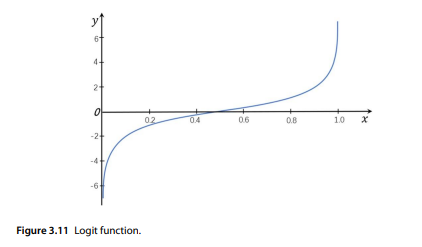

where the sigmoid function is
$$
\sigma(t)=\frac{1}{1+e^{-t}}
$$
for $t \in \mathbb{R}$. To maximize the likelihood of the data, we assume the labels are independent given the features, which is given by
$$
\mathscr{L}(\mathbf{x} ; A, \mathbf{b})=\prod_{i=1}^{n} p\left(\boldsymbol{\alpha}_{i} ; \mathbf{x}\right)^{b_{i}}\left(1-p\left(\boldsymbol{\alpha}_{i} ; \mathbf{x}\right)\right)^{1-b_{i}}
$$

Taking a logarithm, multiplying by $-1 / n$ and substituting the sigmoid function, we want to minimize the cross-entropy loss:
$$
\ell(\mathbf{x} ; A, \mathbf{b})=-\frac{1}{n} \sum_{i=1}^{n} b_{i} \log \left(\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)\right)-\frac{1}{n} \sum_{i=1}^{n}\left(1-b_{i}\right) \log \left(1-\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)\right)
$$

That is, we solve
$$
\min _{\mathbf{x} \in \mathbb{R}^{d}} \ell(\mathbf{x} ; A, \mathbf{b})
$$

To use gradient descent, we need to compute the gradient of $\ell$. We use the chain rule and first compute the derivative of $\sigma$, which is
$$
\sigma^{\prime}(t)=\frac{e^{-t}}{\left(1+e^{-t}\right)^{2}}=\frac{1}{1+e^{-t}}\left(1-\frac{1}{1+e^{-t}}\right)=\sigma(t)(1-\sigma(t))
$$

It follows that $\sigma(t)$ satisfies the logistic differential equation. It arises in a variety of applications, including the modeling of population dynamics.

Here, it will be a convenient way to compute the gradient. Indeed observe that by the chain rule
$$
\nabla_{\mathbf{x}} \sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)=\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)\left(1-\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)\right) \boldsymbol{\alpha}
$$
where we use a subscript $\mathbf{x}$ to make it clear that the gradient is with respect to $\mathbf{x}$.

With the same approach, we have
$$
\begin{aligned}
\nabla_{\mathbf{x}} \ell(\mathbf{x} ; A, \mathbf{b}) & =-\frac{1}{n} \sum_{i=1}^{n} \frac{b_{i}}{\sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)} \nabla_{\mathbf{x}} \sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)+\frac{1}{n} \sum_{i=1}^{n} \frac{1-b_{i}}{1-\sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)} \nabla_{\mathbf{x}} \sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right) \\
& =-\frac{1}{n} \sum_{i=1}^{n}\left(\frac{b_{i}}{\sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)}-\frac{1-b_{i}}{1-\sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)}\right) \sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)\left(1-\sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)\right) \boldsymbol{\alpha}_{i} \\
& =-\frac{1}{n} \sum_{i=1}^{n}\left(b_{i}-\sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)\right) \boldsymbol{\alpha}_{i}
\end{aligned}
$$

To compute the Hessian, we note that
$$
\nabla_{\mathbf{x}}\left(\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right) \alpha_{j}\right)=\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)\left(1-\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)\right) \boldsymbol{\alpha} \alpha_{j}
$$
so that
$$
\nabla_{\mathbf{x}}\left(\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right) \boldsymbol{\alpha}\right)=\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)\left(1-\sigma\left(\boldsymbol{\alpha}^{T} \mathbf{x}\right)\right) \boldsymbol{\alpha} \boldsymbol{\alpha}^{T}
$$

Thus
$$
\nabla_{\mathbf{x}}^{2} \ell(\mathbf{x} ; A, \mathbf{b})=\frac{1}{n} \sum_{i=1}^{n} \sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)\left(1-\sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}\right)\right) \boldsymbol{\alpha}_{i} \boldsymbol{\alpha}_{i}^{T}
$$
where $\nabla_{\mathbf{x}}^{2}$ indicates the Hessian with respect to the $\mathbf{x}$ variables. Now each $\boldsymbol{\alpha}_{i} \boldsymbol{\alpha}_{i}^{T}$ is a symmetric matrix and PSD. As a result, the function $\ell(\mathbf{x} ; A, \mathbf{b})$ is convex as a function of $\mathbf{x} \in \mathbb{R}^{d}$. We want to comment that convexity is one reason for working with the cross-entropy loss rather than the mean squared error.

To update the iteration formula: for step size $\beta$, one step of gradient descent is therefore
$$
\mathbf{x}^{k+1}=\mathbf{x}^{k}+\beta \frac{1}{n} \sum_{i=1}^{n}\left(b_{i}-\sigma\left(\boldsymbol{\alpha}_{i}^{T} \mathbf{x}^{k}\right)\right) \boldsymbol{\alpha}_{i}
$$

In stochastic gradient descent, a variant of gradient descent, we pick a sample $I$ uniformly at random in $\{1, \ldots, n\}$ and update as follows:
$$
\mathbf{x}^{k+1}=\mathbf{x}^{k}+\beta\left(b_{I}-\sigma\left(\boldsymbol{\alpha}_{I}^{T} \mathbf{x}^{k}\right)\right) \boldsymbol{\alpha}_{I} .
$$

**EXAMPLE:**

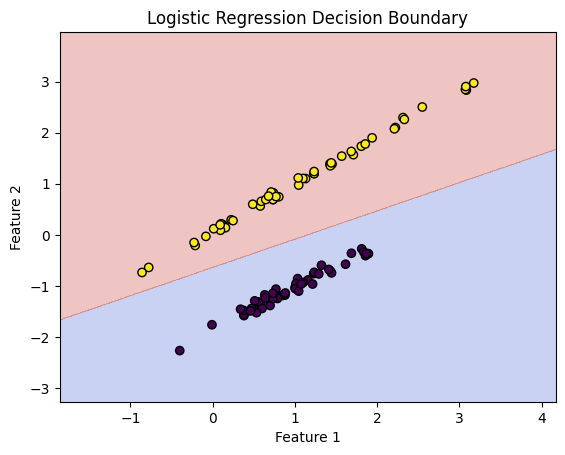

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Step 1: Create a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0,
                           n_informative=2, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Set the limits for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create a meshgrid for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Step 5: Call the function to plot the decision boundary
plot_decision_boundary(X, y, model)
